# Set Up

In [1]:
# Common imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

%matplotlib inline
import matplotlib.pyplot as plt

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Perceptron

In [2]:
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

# Multi-layer Preceptron

### Activation Function

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

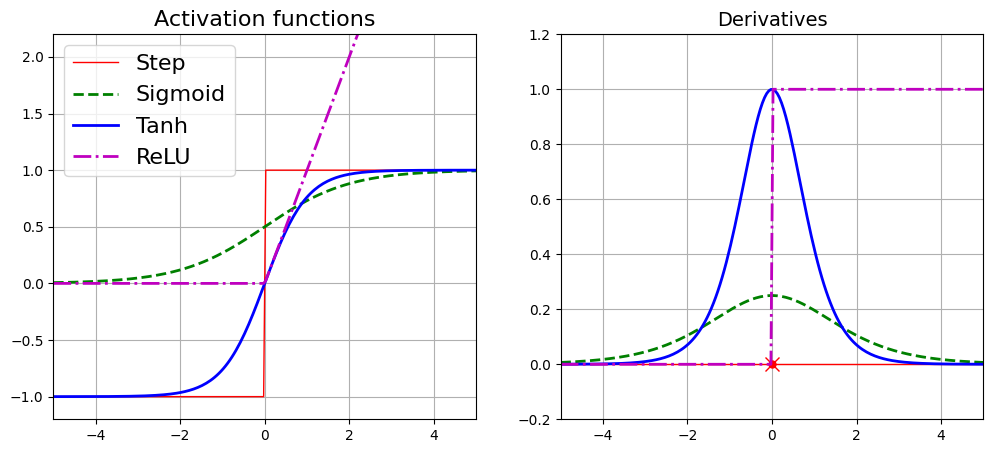

In [4]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(12,5))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="upper left", fontsize=16)
plt.title("Activation functions", fontsize=16)
plt.axis([-5, 5, -1.2, 2.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=16)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

### MLP Classification

In [5]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 1000)
    x1s = np.linspace(axes[2], axes[3], 1000)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.bwr, alpha=0.4)

Train score: 0.9867
Test score: 0.9200


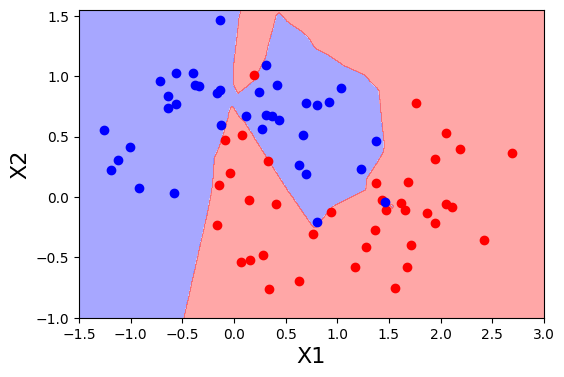

In [6]:
from sklearn.neural_network import MLPClassifier

X, y = make_moons(n_samples=100, noise=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
print('Train score: %.4f' % mlp.score(X_train, y_train))
print('Test score: %.4f' % mlp.score(X_test, y_test))

plt.figure(figsize=(6,4))
plot_predictions(mlp, [-1.5, 3, -1, 1.55])
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color = 'r')
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color = 'b')
plt.xlabel("X1", fontsize = 16)
plt.ylabel("X2", fontsize = 16)
plt.show()

Train score: 0.9067
Test score: 0.9600


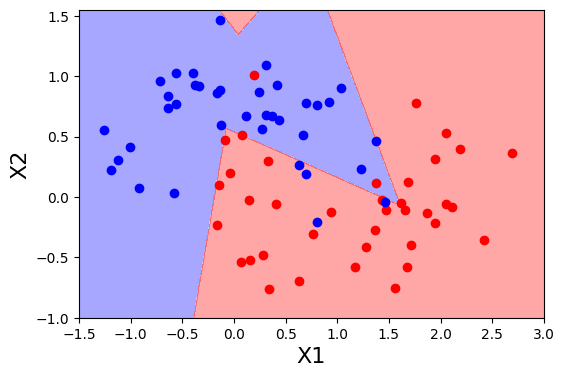

In [7]:
# reduce hidden_layer_sizes from default 100 to 10
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=(10)).fit(X_train, y_train)
print('Train score: %.4f' % mlp.score(X_train, y_train))
print('Test score: %.4f' % mlp.score(X_test, y_test))

plt.figure(figsize=(6,4))
plot_predictions(mlp, [-1.5, 3, -1, 1.55])
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color = 'r')
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color = 'b')
plt.xlabel("X1", fontsize = 16)
plt.ylabel("X2", fontsize = 16)
plt.show()

Train score: 0.9333
Test score: 0.9600


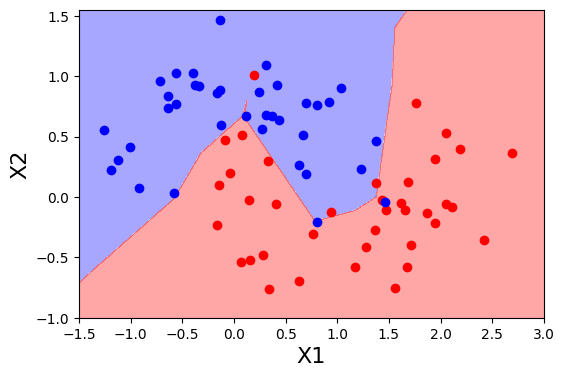

In [8]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=(10, 10)).fit(X_train, y_train)
print('Train score: %.4f' % mlp.score(X_train, y_train))
print('Test score: %.4f' % mlp.score(X_test, y_test))

plt.figure(figsize=(6,4))
plot_predictions(mlp, [-1.5, 3, -1, 1.55])
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color = 'r')
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color = 'b')
plt.xlabel("X1", fontsize = 16)
plt.ylabel("X2", fontsize = 16)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Train score: 1.0000
Test score: 0.9600


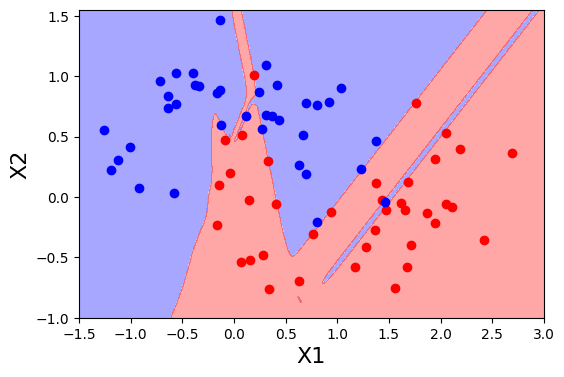

In [9]:
# using two hidden layers, with 10 units each, with tanh nonlinearity.
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=(10, 10)).fit(X_train, y_train)
print('Train score: %.4f' % mlp.score(X_train, y_train))
print('Test score: %.4f' % mlp.score(X_test, y_test))

plt.figure(figsize=(6,4))
plot_predictions(mlp, [-1.5, 3, -1, 1.55])
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color = 'r')
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color = 'b')
plt.xlabel("X1", fontsize = 16)
plt.ylabel("X2", fontsize = 16)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


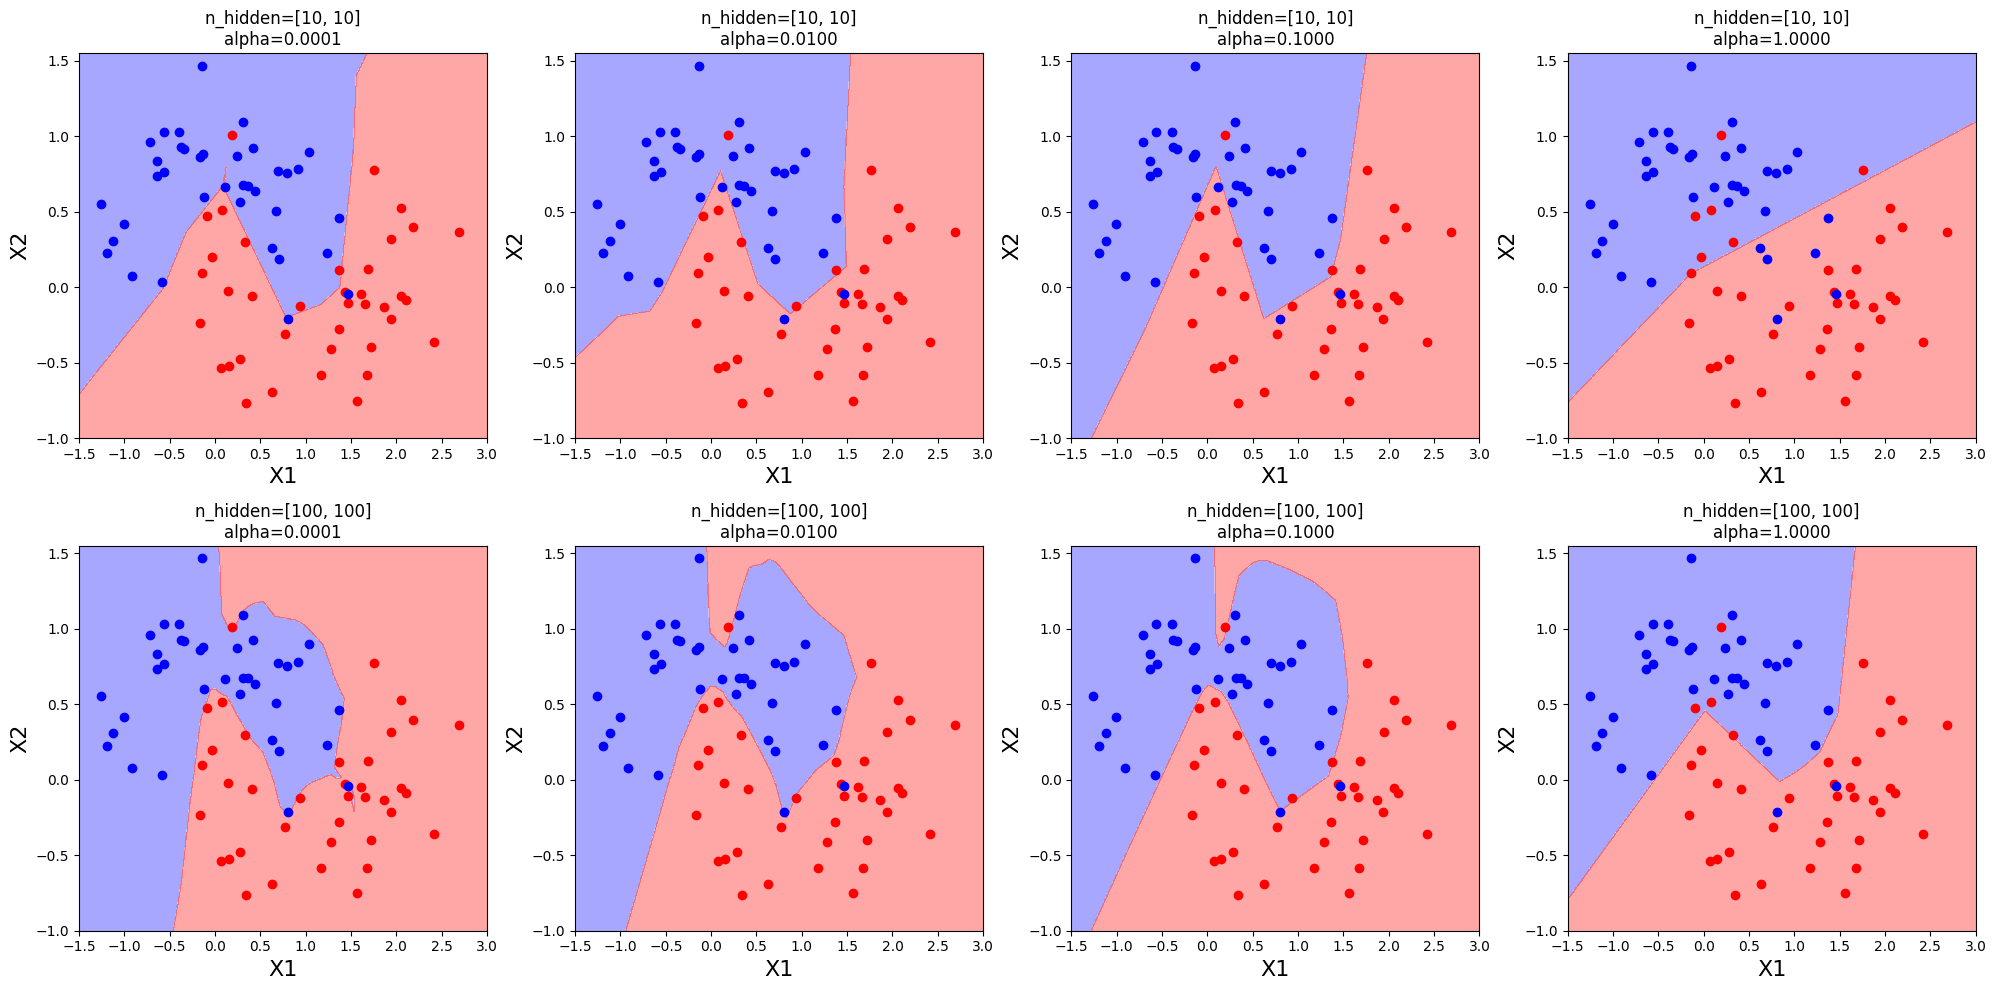

In [10]:
# add l2 penalty
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)

        plt.sca(ax)
        plot_predictions(mlp, [-1.5, 3, -1, 1.55])
        plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color = 'r')
        plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color = 'b')
        plt.xlabel("X1", fontsize = 16)
        plt.ylabel("X2", fontsize = 16)
        plt.title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

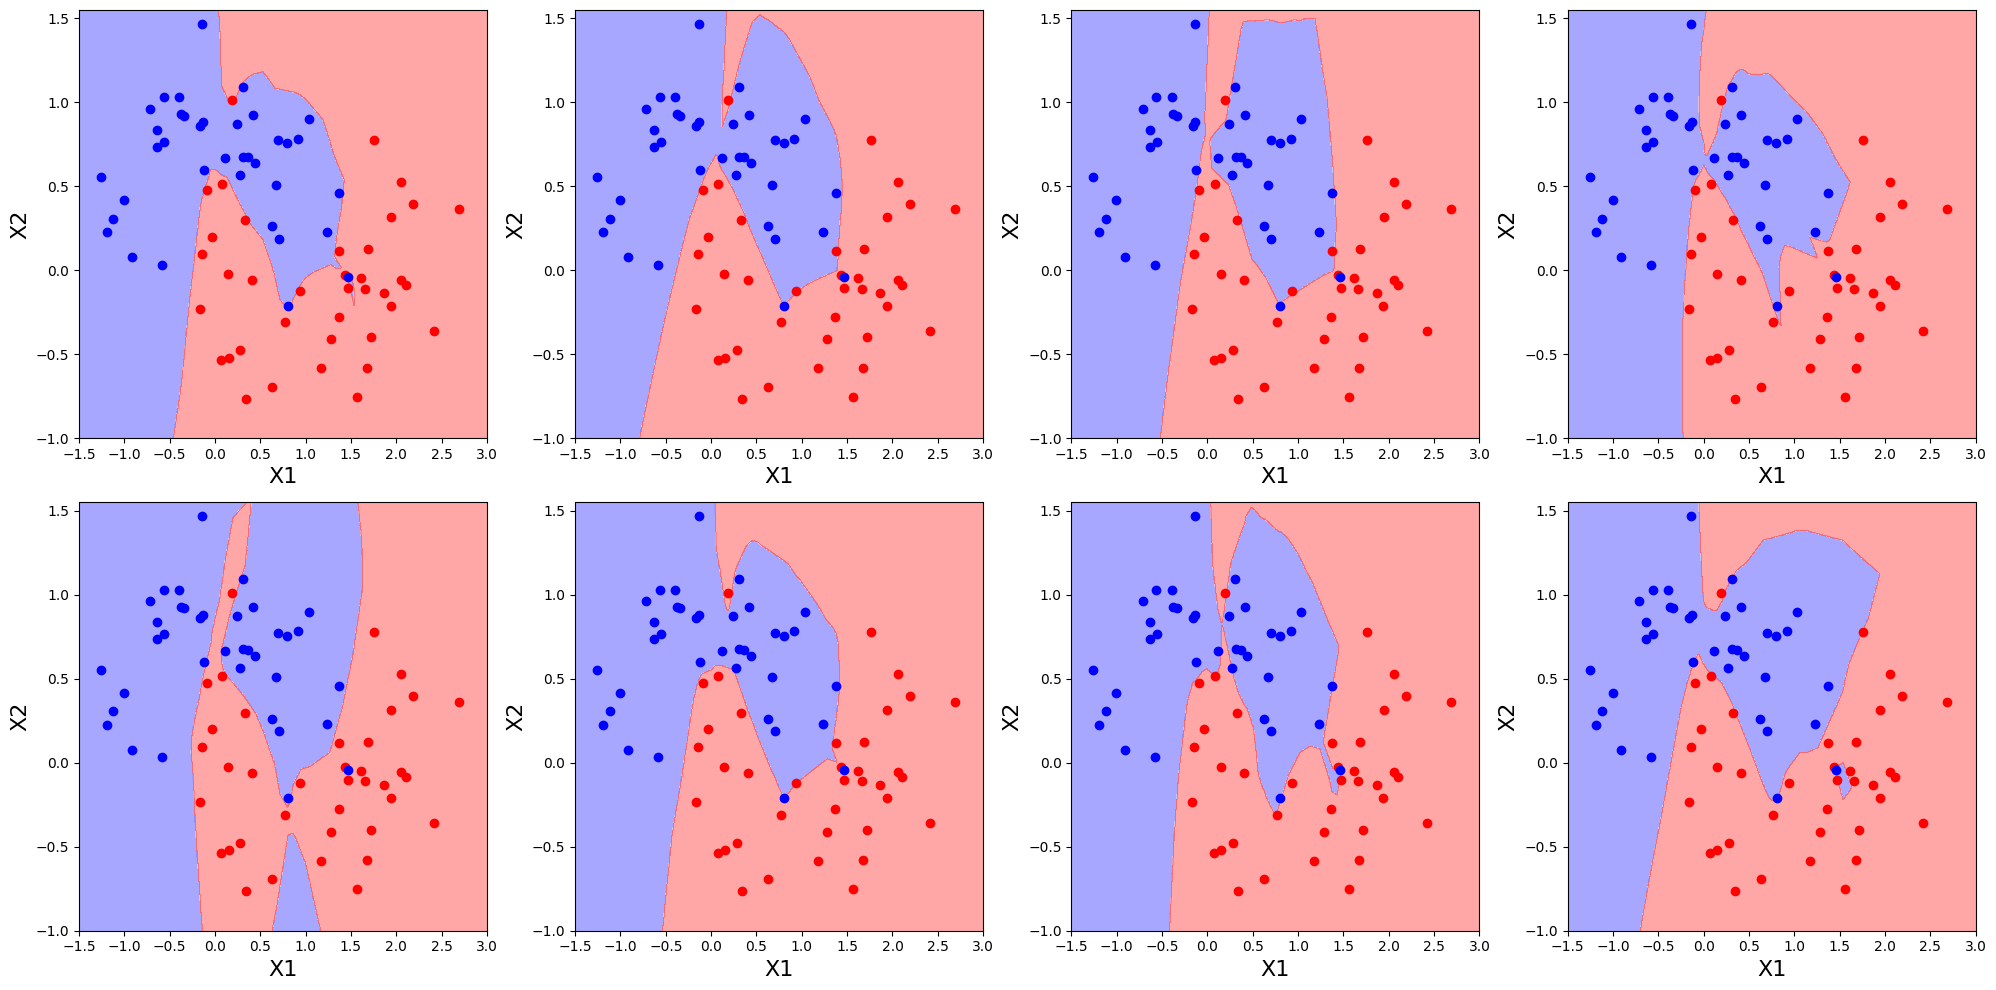

In [11]:
# same set of parameters, but differnt initial weight before learning
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=(100, 100))
    mlp.fit(X_train, y_train)
    plt.sca(ax)
    plot_predictions(mlp, [-1.5, 3, -1, 1.55])
    plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color = 'r')
    plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color = 'b')
    plt.xlabel("X1", fontsize = 16)
    plt.ylabel("X2", fontsize = 16)

plt.tight_layout()
plt.show()

In [12]:
cancer = load_breast_cancer()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print('Train score: %.4f' % mlp.score(X_train, y_train))
print('Test score: %.4f' % mlp.score(X_test, y_test))

Train score: 0.9390
Test score: 0.9161


In [14]:
# standarization
mlp_pipe = make_pipeline(StandardScaler(), MLPClassifier(random_state=42))
mlp_pipe.fit(X_train, y_train)
print('Train score: %.4f' % mlp_pipe.score(X_train, y_train))
print('Test score: %.4f' % mlp_pipe.score(X_test, y_test))

Train score: 0.9930
Test score: 0.9650


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
# increase interation
mlp_pipe = make_pipeline(StandardScaler(), MLPClassifier(max_iter=1000, random_state=42))
mlp_pipe.fit(X_train, y_train)
print('Train score: %.4f' % mlp_pipe.score(X_train, y_train))
print('Test score: %.4f' % mlp_pipe.score(X_test, y_test))

Train score: 1.0000
Test score: 0.9650


In [16]:
# increase regularization
mlp_pipe = make_pipeline(StandardScaler(), MLPClassifier(max_iter=1000, alpha = 1, random_state=42))
mlp_pipe.fit(X_train, y_train)
print('Train score: %.4f' % mlp_pipe.score(X_train, y_train))
print('Test score: %.4f' % mlp_pipe.score(X_test, y_test))

Train score: 0.9859
Test score: 0.9790


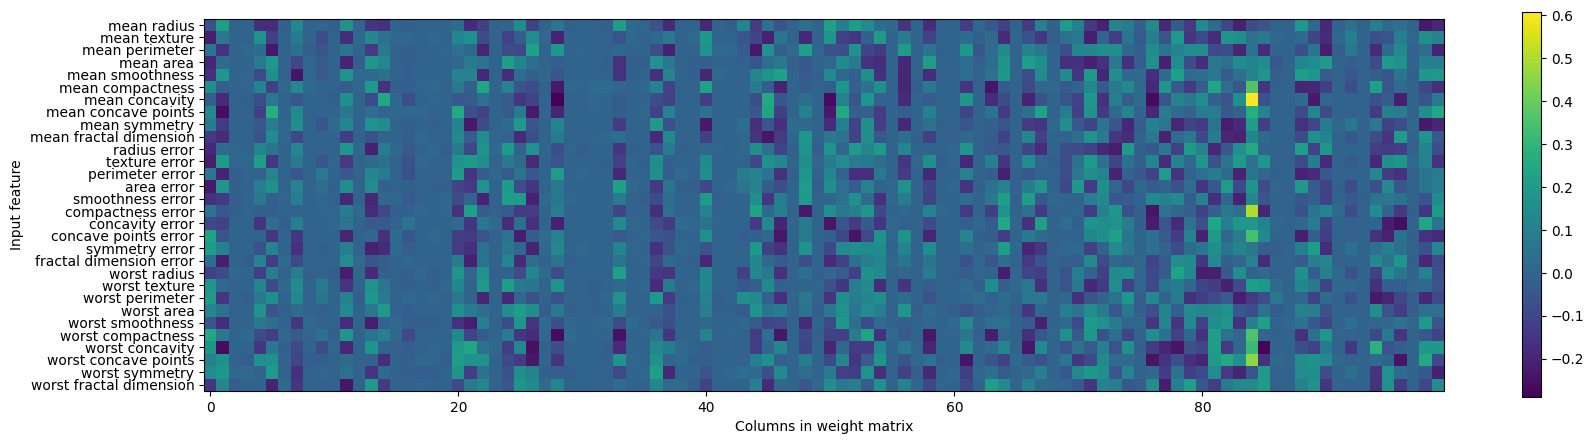

In [17]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.show()

In [18]:
# gradisearch with regualrization
mlp_pipe = make_pipeline(StandardScaler(), MLPClassifier(max_iter=1000, random_state=42))
param_grid = {'mlpclassifier__alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(mlp_pipe, param_grid, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('mlpclassifier',
                                        MLPClassifier(max_iter=1000,
                                                      random_state=42))]),
             param_grid={'mlpclassifier__alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             return_train_score=True)

In [19]:
results = pd.DataFrame(grid.cv_results_)
res_df = results.pivot_table(index="param_mlpclassifier__alpha",
                             values=["mean_test_score", "mean_train_score",
                                     "std_test_score", "std_train_score"])
res_df

,mean_test_score,mean_train_score,std_test_score,std_train_score
param_mlpclassifier__alpha,,,,
0.001,0.976498,0.998239,0.016657,0.001438
0.010,0.976498,0.998239,0.016657,0.001438
0.100,0.981204,0.997066,0.015971,0.000003
1.000,0.983529,0.990609,0.017608,0.003425
10.000,0.976525,0.981804,0.012888,0.004327
100.000,0.899070,0.907276,0.009301,0.003014
1000.000,0.626758,0.626760,0.004593,0.001145


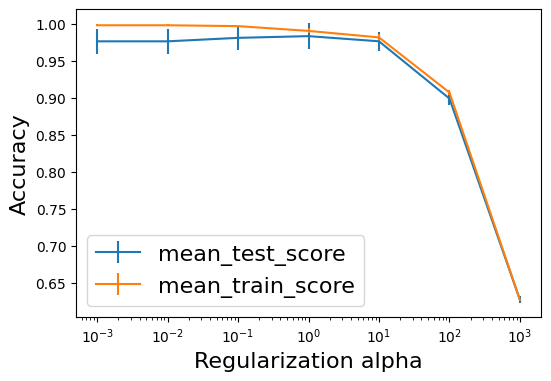

In [20]:
plt.figure(figsize=(6,4))
res_df.mean_test_score.plot(yerr=res_df.std_test_score)
res_df.mean_train_score.plot(yerr=res_df.std_train_score)
plt.xscale("log")
plt.xlabel("Regularization alpha", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

In [21]:
# gradisearch with hidden layer
mlp_pipe = make_pipeline(StandardScaler(), MLPClassifier(max_iter=1000, random_state=42))
param_grid = {'mlpclassifier__hidden_layer_sizes':
              [(10,), (50,), (100,), (500,), (10, 10), (50, 50), (100, 100), (500, 500)]
             }
grid = GridSearchCV(mlp_pipe, param_grid, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('mlpclassifier',
                                        MLPClassifier(max_iter=1000,
                                                      random_state=42))]),
             param_grid={'mlpclassifier__hidden_layer_sizes': [(10,), (50,),
                                                               (100,), (500,),
                                                               (10, 10),
                                                               (50, 50),
                                                               (100, 100),
                                                               (500, 500)]},
             return_train_score=True)

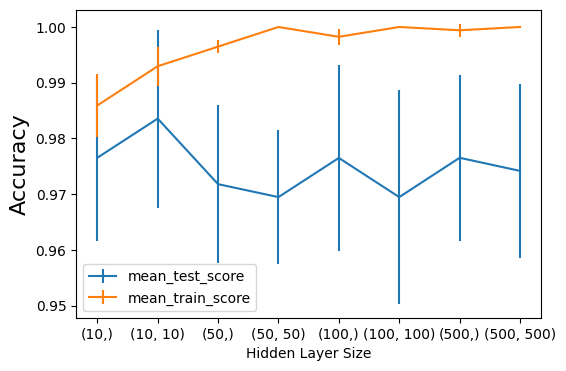

In [22]:
results = pd.DataFrame(grid.cv_results_)
res_df = results.pivot_table(index="param_mlpclassifier__hidden_layer_sizes",
                             values=["mean_test_score", "mean_train_score",
                                     "std_test_score", "std_train_score"])
plt.figure(figsize=(6,4))
res_df.mean_test_score.plot(yerr=res_df.std_test_score)
res_df.mean_train_score.plot(yerr=res_df.std_train_score)
plt.xlabel("Hidden Layer Size", fontsize = 10)
plt.ylabel("Accuracy", fontsize = 16)
plt.legend()
plt.show()

### MLP Regression

In [23]:
# make data
rng = np.random.RandomState(42)
x = np.sort(rng.uniform(size=100))
y = np.sin(10 * x) + 5 * x + np.random.normal(0, .3, size=100)
X = x.reshape(-1, 1)

In [24]:
from sklearn.neural_network import MLPRegressor
mlp_relu = MLPRegressor(solver="lbfgs").fit(X, y)
mlp_tanh = MLPRegressor(solver="lbfgs", activation='tanh').fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


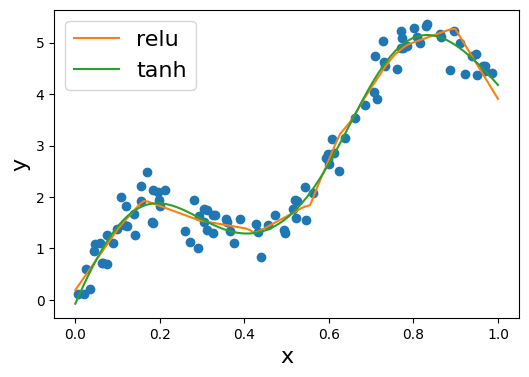

In [25]:
line = np.linspace(0, 1, 100)
plt.figure(figsize = (6,4))
plt.plot(x, y, 'o')
plt.plot(line, mlp_relu.predict(line.reshape(-1, 1)), label="relu")
plt.plot(line, mlp_tanh.predict(line.reshape(-1, 1)), label="tanh")
plt.legend(fontsize = 16)
plt.xlabel("x", fontsize = 16)
plt.ylabel("y", fontsize = 16)
plt.show()